In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_excel(r'Data\std_pca_100.xlsx')
test = pd.read_excel(r'Data\Test - Final Data - PCA - 100.xlsx')

In [3]:
X = train.drop(columns = ['label', 'id'])
y = train['label']

X_test = test.drop(columns = 'id')

In [4]:
from imblearn.combine import SMOTEENN
X_train, y_train = SMOTEENN(sampling_strategy = 'minority', random_state=42).fit_resample(X,y)
print("Original training datapoints:", len(X))
print("SMOTE oversampled datapoints:",len(X_train))


Using TensorFlow backend.
C:\Users\nctha\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nctha\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nctha\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Original training datapoints: 30000
SMOTE oversampled datapoints: 47341


In [5]:
y.value_counts()

0    29514
1      486
Name: label, dtype: int64

In [6]:
y_train.value_counts()

1    23883
0    23458
Name: label, dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


# Other Libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import make_scorer, confusion_matrix, auc, plot_roc_curve
from collections import Counter
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.classifier import ClassificationReport
from xgboost import XGBClassifier

In [8]:
# Invoke classifier
clf = LogisticRegression()

# Cross-validate on the train data
train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,scoring = 'roc_auc',cv=10)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predicted_probas = clf.predict_proba(X_train)

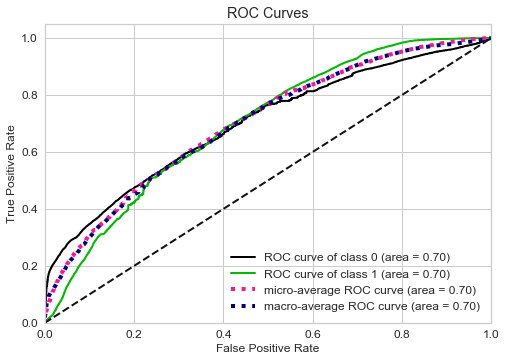

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_train
y_probas = predicted_probas
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

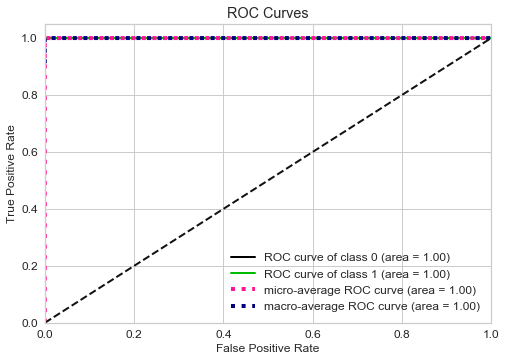

In [11]:
clf = RandomForestClassifier()
train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,scoring = 'roc_auc',cv=10)
clf.fit(X_train, y_train)
predicted_probas = clf.predict_proba(X_train)
y_true = y_train
y_probas = predicted_probas
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [12]:
X_train.shape

(47341, 100)

In [28]:
result = test[['id']]
result['label'] = clf.predict_proba(X_test)[:,1]

In [29]:
clf.predict_proba(X_test)[:,1]

array([0.39607843, 0.36      , 0.21      , ..., 0.36      , 0.17      ,
       0.24      ])

In [30]:
result.to_csv('Result\submit_RF_default_100d_pca.csv', index = False)